In [ ]:
#import library
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
diabetes_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/diabetes2.csv") #membuat variabel untuk dataset
diabetes_df.head() 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


total value Outcome 0 =  500
total value Outcome 1 =  268


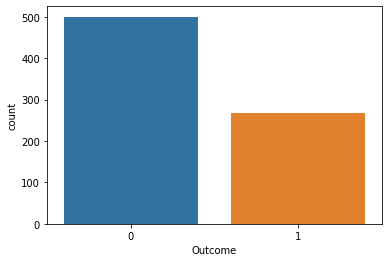

In [ ]:
outcome_0=diabetes_df.loc[diabetes_df.Outcome==0,'Outcome'].count()
print('total value Outcome 0 = ',outcome_0)
outcome_1=diabetes_df.loc[diabetes_df.Outcome==1,'Outcome'].count()
print('total value Outcome 1 = ',outcome_1)

sns.countplot(x='Outcome',data=diabetes_df)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tugas_akhir/dataset/Copy of diabetes2.csv') #membuat variabel untuk dataset
df.head() 
#data dibuat dengan teknik one point cross over


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#proses Penggabungan data
frames = [diabetes_df, df] 
diabetes_df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
# informasi tipe data dan jumlah dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# deskripsi statistik
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# proses missing value
# mengisi data yang kosong dengan rata-rata
diabetes_df.loc[:,'Pregnancies':'Age']=diabetes_df.loc[:,'Pregnancies':'Age'].replace(0,diabetes_df.loc[:,'Pregnancies':'Age'].mean())
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
# ubah 'Pregnancies' dan 'Insulin' ke dalam tipe integer
diabetes_df.loc[:,'Pregnancies':'Insulin']=diabetes_df.loc[:,'Pregnancies':'Insulin'].astype(int) # konversi ke integer
all_data=pd.DataFrame(diabetes_df)
all_data.to_csv('/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/all_data.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,3,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885,0.348958
std,3.021516,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Z-score normalization
from sklearn import preprocessing
xi = preprocessing.StandardScaler().fit(diabetes_df.loc[:,'Pregnancies':'Age']).transform(diabetes_df.loc[:,'Pregnancies':'Age'])
#xi[0:5]
diabetes_df.loc[:,'Pregnancies':'Age']=xi
diabetes_df.head()
normalisasi=pd.DataFrame(diabetes_df)
normalisasi.to_csv('/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/normalisasi.csv')
diabetes_df.head()
## Z-score / Standarisasi : (x-mean) /stdev ## patokan dari mean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.570070,0.865461,-0.020645,0.879163,-0.421437,0.167255,0.468492,1.425995,1
1,-1.085807,-1.205788,-0.516132,0.262357,-0.421437,-0.851535,-0.365061,-0.190672,0
2,1.232421,2.016154,-0.681294,-0.662852,-0.421437,-1.331821,0.604397,-0.105584,1
3,-1.085807,-1.074281,-0.516132,-0.354449,-0.260464,-0.633222,-0.920763,-1.041549,0
4,-0.423456,0.503814,-2.663240,0.879163,0.533672,1.549899,5.484909,-0.020496,1


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,1.063964e-16,6.938894e-18,-1.156482e-17,-1.156482e-16,7.170190e-17,-3.168762e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.085807e+00,-2.553744e+00,-3.984537e+00,-1.999265e+00,-1.118989e+00,-2.074083e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-7.546315e-01,-7.208532e-01,-6.812939e-01,-6.628522e-01,-4.214373e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-4.234561e-01,-1.537255e-01,-2.064527e-02,-3.544493e-01,-4.214373e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01,0.000000
75%,5.700702e-01,6.106640e-01,6.400034e-01,5.707597e-01,9.636046e-02,6.038797e-01,4.662269e-01,6.602056e-01,1.000000
max,4.213000e+00,2.542186e+00,4.108409e+00,7.458426e+00,7.809669e+00,5.042893e+00,5.883565e+00,4.063716e+00,1.000000


In [ ]:
# Korelasi data : numerik
corr = diabetes_df.corr()
korelasi=pd.DataFrame(corr)
korelasi.to_csv('/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/korelasi.csv')
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149021,0.246335,0.033919,-0.018112,0.080538,-0.016151,0.538169,0.245466
Glucose,0.149021,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673,0.492884
BloodPressure,0.246335,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791,0.162879
SkinThickness,0.033919,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582,0.171857
Insulin,-0.018112,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676,0.178696
BMI,0.080538,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.016151,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561,0.173844
Age,0.538169,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000,0.238356
Outcome,0.245466,0.492884,0.162879,0.171857,0.178696,0.312254,0.173844,0.238356,1.000000


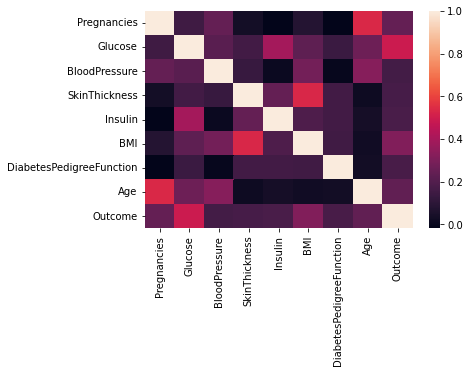

In [ ]:
# Korelasi data : peta panas / heatmap
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [ ]:
# Mengurutkan data menurut korelasinya 
target_corr = abs(corr['Outcome'])

target_corr.sort_values()

BloodPressure               0.162879
SkinThickness               0.171857
DiabetesPedigreeFunction    0.173844
Insulin                     0.178696
Age                         0.238356
Pregnancies                 0.245466
BMI                         0.312254
Glucose                     0.492884
Outcome                     1.000000
Name: Outcome, dtype: float64

In [ ]:
diabetes_df.drop(columns=['BloodPressure','SkinThickness'],inplace=True)
diabetes_df.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.570070,0.865461,-0.421437,0.167255,0.468492,1.425995,1
1,-1.085807,-1.205788,-0.421437,-0.851535,-0.365061,-0.190672,0
2,1.232421,2.016154,-0.421437,-1.331821,0.604397,-0.105584,1
3,-1.085807,-1.074281,-0.260464,-0.633222,-0.920763,-1.041549,0
4,-0.423456,0.503814,0.533672,1.549899,5.484909,-0.020496,1


In [ ]:
#array variabel x 
X = np.asarray(diabetes_df.loc[:,diabetes_df.columns != 'Outcome'])
X[0:5]

array([[ 0.57007018,  0.86546051, -0.42143728,  0.16725546,  0.46849198,
         1.4259954 ],
       [-1.08580689, -1.2057885 , -0.42143728, -0.85153454, -0.36506078,
        -0.19067191],
       [ 1.23242101,  2.0161544 , -0.42143728, -1.33182125,  0.60439732,
        -0.10558415],
       [-1.08580689, -1.07428062, -0.26046389, -0.6332224 , -0.92076261,
        -1.04154944],
       [-0.42345606,  0.50381385,  0.5336715 ,  1.54989902,  5.4849091 ,
        -0.0204964 ]])

In [ ]:
#array variabel y
y = np.asarray(diabetes_df['Outcome'])
y [0:5]

array([1, 0, 1, 0, 1])

total value Outcome 0 =  500
total value Outcome 1 =  268


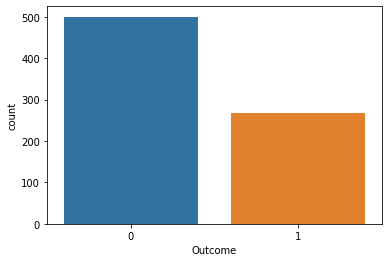

In [ ]:
outcome_0=diabetes_df.loc[diabetes_df.Outcome==0,'Outcome'].count()
print('total value Outcome 0 = ',outcome_0)
outcome_1=diabetes_df.loc[diabetes_df.Outcome==1,'Outcome'].count()
print('total value Outcome 1 = ',outcome_1)

sns.countplot(x='Outcome',data=diabetes_df)


In [ ]:
#train test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,shuffle=True, random_state=20) #variabel untuk data train & test
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
xtrain_data=pd.DataFrame(X_train)
ytrain_data=pd.DataFrame(y_train)
train_data = pd.merge(xtrain_data, ytrain_data, left_index=True, right_index=True)
train_data.to_csv('/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/train_data.csv')
xtest_data=pd.DataFrame(X_test)
ytest_data=pd.DataFrame(y_test)
test_data = pd.merge(xtest_data, ytest_data, left_index=True, right_index=True)
test_data.to_csv('/content/drive/My Drive/Colab Notebooks/Tugas_akhir/dataset/test_data.csv')
test_data.head()

Train set: (614, 6) (614,)
Test set: (154, 6) (154,)


,0_x,1,2,3,4,5,0_y
0,-0.423456,-0.252356,1.789264,1.709995,-0.920763,-0.531023,0
1,-0.754631,-0.318110,0.447819,0.865854,-0.682173,-0.445935,0
2,-0.092281,0.010659,-0.421437,0.371013,-0.235196,-0.360847,0
3,-1.085807,-0.811265,-0.421437,-2.074083,-0.981165,-1.041549,0
4,1.894772,1.325738,-0.421437,-0.691439,-0.875461,1.766346,0


---


In [ ]:
from sklearn.model_selection import GridSearchCV
LR=LogisticRegression()
param_grid={'tol':np.arange(0.0001,0.1),'C':np.arange(0.01,1.0),'fit_intercept':[True,False,'none'],'intercept_scaling':np.arange(0.01,1.0),
'random_state':np.arange(0,100),'solver':['liblinear']}
gscv=GridSearchCV(LR,param_grid=param_grid,scoring='roc_auc',cv=7)
gscv.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'C': array([0.01]),
                         'fit_intercept': [True, False, 'none'],
                         'intercept_scaling': array([0.01]),
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'solver': ['liblinear'], 'tol': array([0.0001])},
             scoring='roc_auc')

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True, # menggunakan bias
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,  #maksimal iterasi
                                          multi_class='auto', #karena binary
                                          n_jobs=None, penalty='l2',
                                          random_state=None, 
                                          solver='lbfgs', #default : lbfgs, bagus untuk dataset kecil, https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406
                                          tol=0.0001, verbose=0,
                                          warm_start=False).fit(X_train,y_train)


In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
#prediksi probabilitas
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.66807142, 0.33192858],
       [0.78086494, 0.21913506],
       [0.67619446, 0.32380554],
       [0.97873664, 0.02126336],
       [0.30444628, 0.69555372],
       [0.104233  , 0.895767  ],
       [0.77478222, 0.22521778],
       [0.6728095 , 0.3271905 ],
       [0.82296731, 0.17703269],
       [0.84888576, 0.15111424],
       [0.95145056, 0.04854944],
       [0.18770023, 0.81229977],
       [0.93876752, 0.06123248],
       [0.78545503, 0.21454497],
       [0.83322063, 0.16677937],
       [0.72259025, 0.27740975],
       [0.34388651, 0.65611349],
       [0.65173342, 0.34826658],
       [0.94031329, 0.05968671],
       [0.86389947, 0.13610053],
       [0.29508971, 0.70491029],
       [0.9351884 , 0.0648116 ],
       [0.75447356, 0.24552644],
       [0.03077023, 0.96922977],
       [0.91378003, 0.08621997],
       [0.52540074, 0.47459926],
       [0.11956859, 0.88043141],
       [0.55448563, 0.44551437],
       [0.85588808, 0.14411192],
       [0.86084398, 0.13915602],
       [0.

Confusion matrix, without normalization
[[31 23]
 [ 5 95]]


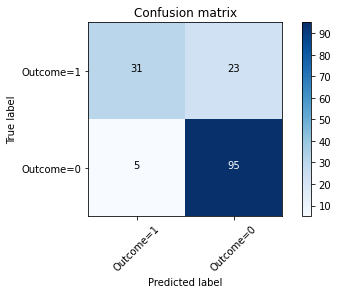

In [ ]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')  
    plt.xlabel('Predicted label')
#print(confusion_matrix(y_test, yhat, labels=[1,0]))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
#confusion matrix berdasarkan data test y dan prediksi x test 
plot_confusion_matrix(cnf_matrix, classes=['Outcome=1','Outcome=0'],normalize=False,  title='Confusion matrix')


In [ ]:
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.81      0.95      0.87       100
           1       0.86      0.57      0.69        54

    accuracy                           0.82       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.82      0.82      0.81       154

